# Data-Driven Insights for a Modern Film Studio


# 1. Business Understanding

## 1.1 Overview
The global movie industry has undergone major shifts in recent years, with changes in consumer behavior, streaming trends, and content production strategies. Streaming platforms such as Netflix and Prime are reshaping how content is consumed and evaluated. While theatrical revenue remains an important success metric, online ratings, platform distribution and viewer engagement have become just as critical in predicting and evaluating a movie's performance.

As a new entrant in the movie production industry, understanding what drives a movie’s commercial success is crucial for making data-driven decisions in production, marketing, and distribution.

This project seeks to uncover actionable insights from historical movie data to uncover what drives both financial and audience success, and how this knowledge can inform business strategy for a potential new film studio.


## 1.2 Background
With increased competition from both traditional cinema and digital streaming platforms, studios need to optimize decisions around:

* Genre selection

* Budget allocation

* Casting

* Timing of releases

* Marketing focus

* Platform strategy - Balancing between the box office and streaming platforms

By analyzing both theatrical and streaming success, studios can better navigate this complex, hybrid distribution landscape. Data from past movies including box office revenue, ratings, genres, and production details can reveal patterns and predictors of success.

This analysis will serve as a proof of concept for how a data-driven approach can enhance Return on Investment(ROI) and reduce risk in movie production.


## 1.3 Objectives
The primary objectives of this project are:

1. To identify the key factors that contribute to a movie's success (e.g. revenue, high ratings, box office success, streaming performance)

2. To provide data-backed recommendations for genre selection, ideal budgets, release strategy and cast decisions

3. To build visualizations and models that support strategic decisions for a new movie production company


## 1.4 Problem Statement

A new movie production company is seeking to make informed decisions about:

* What types of movies to produce (genre, language, duration)

* How much budget to allocate

* When to release their movies

* Which actors or directors are most associated with successful projects

* Decide whether to prioritize theatrical releases, streaming or a hybrid model

The challenge is to analyze historical movie data to find patterns that can help predict which factors lead to higher box office performance or audience engagement.


## 1.5 Metrics of Success

* Identification of top 5 features most correlated with success metrics

* Creation of visual dashboards to communicate findings clearly

* Development of a simple predictive model for revenue or rating to estimate movie success

* Strategic, business-friendly recommendations based on findings

* Well-documented collaboration and communication via GitHub, Trello, and reporting tools


## 1.6 Tools & Technologies
- Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn)

- Jupyter Notebooks for analysis

- Git & GitHub for version control and collaboration

- Trello for project management and workflow tracking

- Google Docs for the final data report

- Google Slides for the Presentation

- Tableau for Interactive Dashboard


## 1.7 Stakeholders

The primary stakeholder is the founding team of the new movie production studio.

Secondary stakeholders include potential investors, marketing consultants, streaming partners and creative directors.

# 2. Data Understanding

In order to uncover what drives a movie’s success, both financially and in terms of audience reception, we must first develop a thorough understanding of the data at our disposal. This section explores the structure, scope, and quality of the datasets used for analysis.

Our data sources include publicly available movie datasets with information on:

* **Movie metadata**: title, genre, release date, language, runtime, production companies

* **Financial data**: production budget, box office revenue (domestic & worldwide)

* **Ratings**: IMDb scores, Rotten Tomatoes critic/audience ratings

* **Streaming availability**: whether the movie was released theatrically, via DVD or streaming, or both

* **Cast and crew**: actors, directors, and producers

The movie datasets are drawn from: 
* [IMDb](https://www.imdb.com/)
* [The Movie DB](https://www.themoviedb.org/)

The datasets are in the following formats:
* im.db (sqLite Database)
* tn.movie_budgets.csv (CSV File)

By reviewing the attributes of these datasets and exploring initial patterns, we aim to:

* *Identify which variables are relevant to our business goals and their data types*
* *Detect any missing, duplicated, or inconsistent records*
* *Gain early insights into data trends that may inform modeling later on*

This understanding will serve as the foundation for cleaning, feature engineering, and deeper analysis in the next stages of the project.

## 2.1 Importing Essential Libraries

Before diving into data exploration, we need to import the key Python libraries that will support our data analysis, visualization, and modeling tasks.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2.2 Visualisation of a previously explored and cleaned movie basics and movie ratings Data, drawn from IMDB tables

In this section, we develop visualisations using python libraries to find technical insights on what information we wantt to conclude from the data we have. We can asses our problem statements and come up with business friendly recommendations based on our findings.

In [3]:
df = pd.read_csv("movie_basics.csv")
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146143 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
df.isnull().sum()

movie_id           0
primary_title      1
original_title     1
start_year         0
runtime_minutes    0
genres             0
dtype: int64

### 2.2.1 Distribution of Movie Runtimes
Here we take a look at what is the most common movie runtimes that is adopted by majority of films

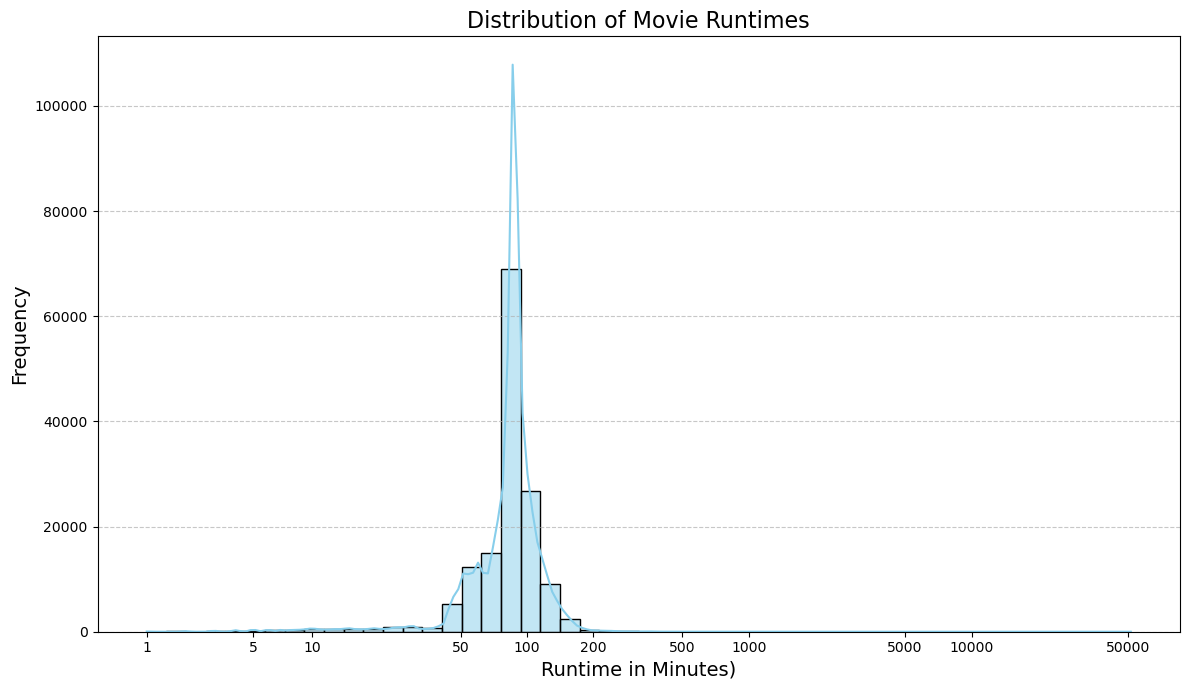

In [105]:
runtime_data = df["runtime_minutes"]

log_runtime_data = np.log1p(runtime_data)

plt.figure(figsize=(12, 7))

# Plotting the histogram of log-transformed data
sns.histplot(log_runtime_data, bins=50, kde=True, color='skyblue')

# Setting labels and title
plt.title('Distribution of Movie Runtimes', fontsize=16)
plt.xlabel('Runtime in Minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add custom x-axis ticks to show runtime values since the data has an extremely wide range, from 1 minute all the way up to 51,000 minutes 
# This helps in interpreting the log scale (choose relevant points)
original_ticks = [1, 5, 10, 50, 100, 200, 500, 1000, 5000, 10000, 50000]
log_ticks = np.log1p(original_ticks)
plt.xticks(log_ticks, [str(int(val)) for val in original_ticks])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

***Observation***

The most important takeaway is that the vast majority of our movies have a "sweet spot" runtime of about 80 to a little under 200 minutes. The tall peak you see on the graph in that range tells us that's where most of our content lies.

### 2.2.2 Trend of Number of Movies Produced Over The Years
We have a look at the number of movies produced every year for the past 10 years and see if we can draw conclusions from it

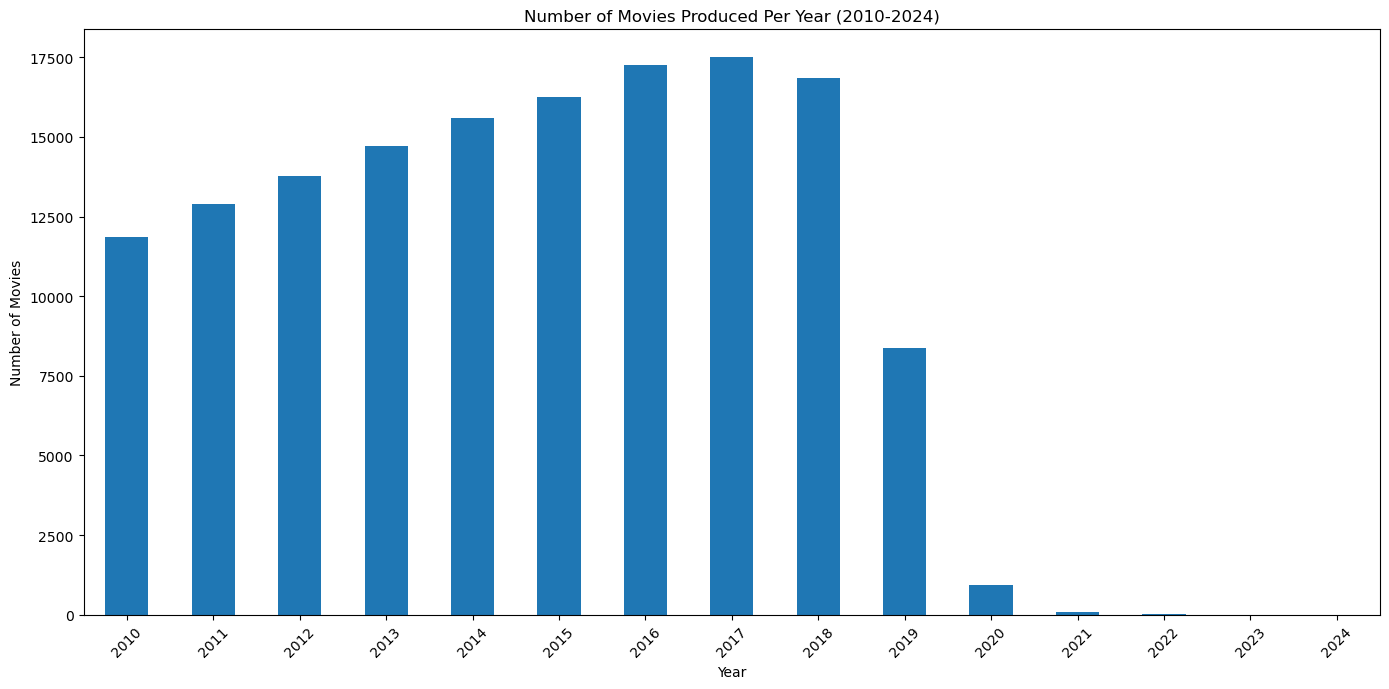

In [17]:
# Count the number of movies for each year in the filtered period
df1 = df[(df['start_year'] >= 2010) & (df['start_year'] <= 2024)]
movies_per_year = df1['start_year'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(14, 7))
movies_per_year.plot(kind='bar')
plt.title('Number of Movies Produced Per Year (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()

**Observation**

This bar chart displays the total number of movies produced each year from 2010 to around 2020. This provides a clear picture of the growth in film production.

***Growth***: There has been a steady increase in the number of movies produced annually.

***Peak Production***: Movie production appears to have peaked in the years leading up to 2018-2019.

***Recent Dip***: There's a visible decline in the number of movies in the most recent years shown on the chart, which could be attributed to a variety of factors, including the impact of the COVID-19 pandemic on the film industry.

### 2.2.3 Evolution of Movie Runtime Minutes
How has the length of movies been progressing over the years, what trend are most movie studios taking in order to generate more revenue

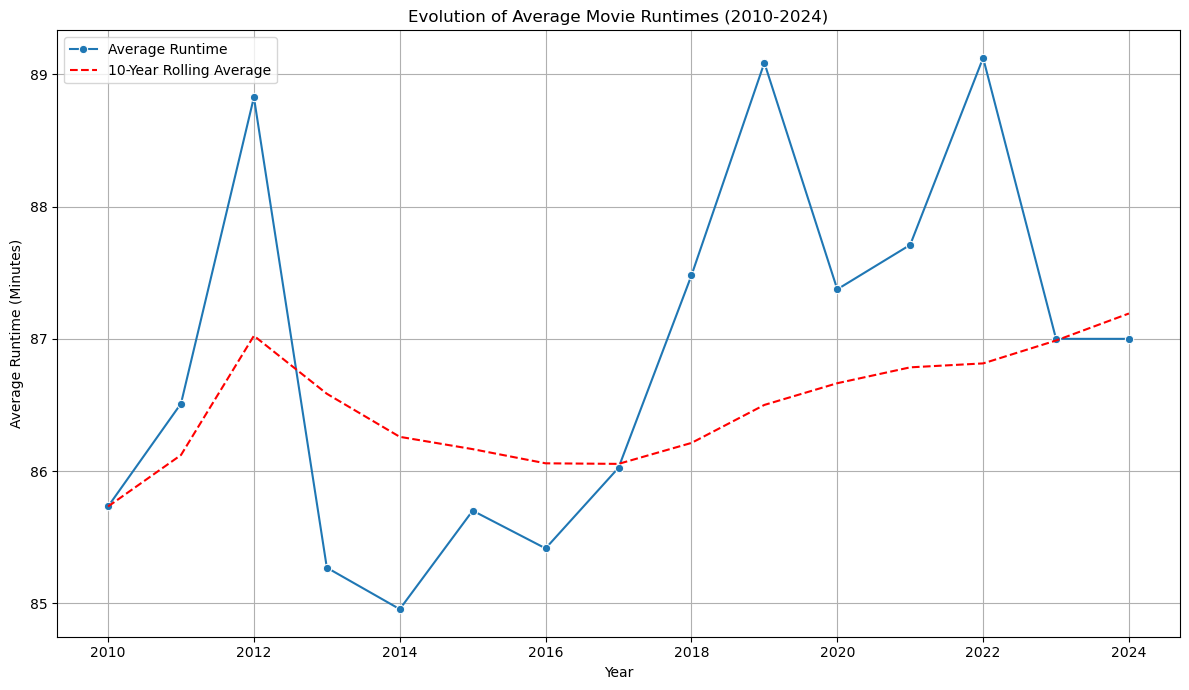

In [107]:
df1 = df[(df['start_year'] >= 2010) & (df['start_year'] <= 2024)]


# Group data by year and calculate the average runtime for the filtered period
runtime_by_year = df1.groupby('start_year')['runtime_minutes'].mean().reset_index()

# Calculate a 10-year rolling average to smooth the trend line for this shorter period
runtime_by_year['runtime_rolling_avg'] = runtime_by_year['runtime_minutes'].rolling(window=10, min_periods=1).mean()

# Create the line plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=runtime_by_year, x='start_year', y='runtime_minutes', label='Average Runtime', marker='o')
sns.lineplot(data=runtime_by_year, x='start_year', y='runtime_rolling_avg', label='10-Year Rolling Average', color='red', linestyle='--')
plt.title('Evolution of Average Movie Runtimes (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Average Runtime (Minutes)')
plt.legend()
plt.grid(True)
# Ensure x-axis ticks are integers for years
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()

**Observation**

This line plot tracks the average runtime of movies from 2010 to 2024. To make the trend clearer, a 10-year rolling average is also plotted to smooth out short term fluctuations and give actual direction of the average.

There has been a noticeable and steady increase in the average runtime of movies. The 10-year rolling average (the red dashed line) clearly shows this upward trend, suggesting that movies, on average, are indeed getting longer.

### 2.2.4 Overview of The Most Common Movie Genres
What are the top movie genres that are released by movie studios

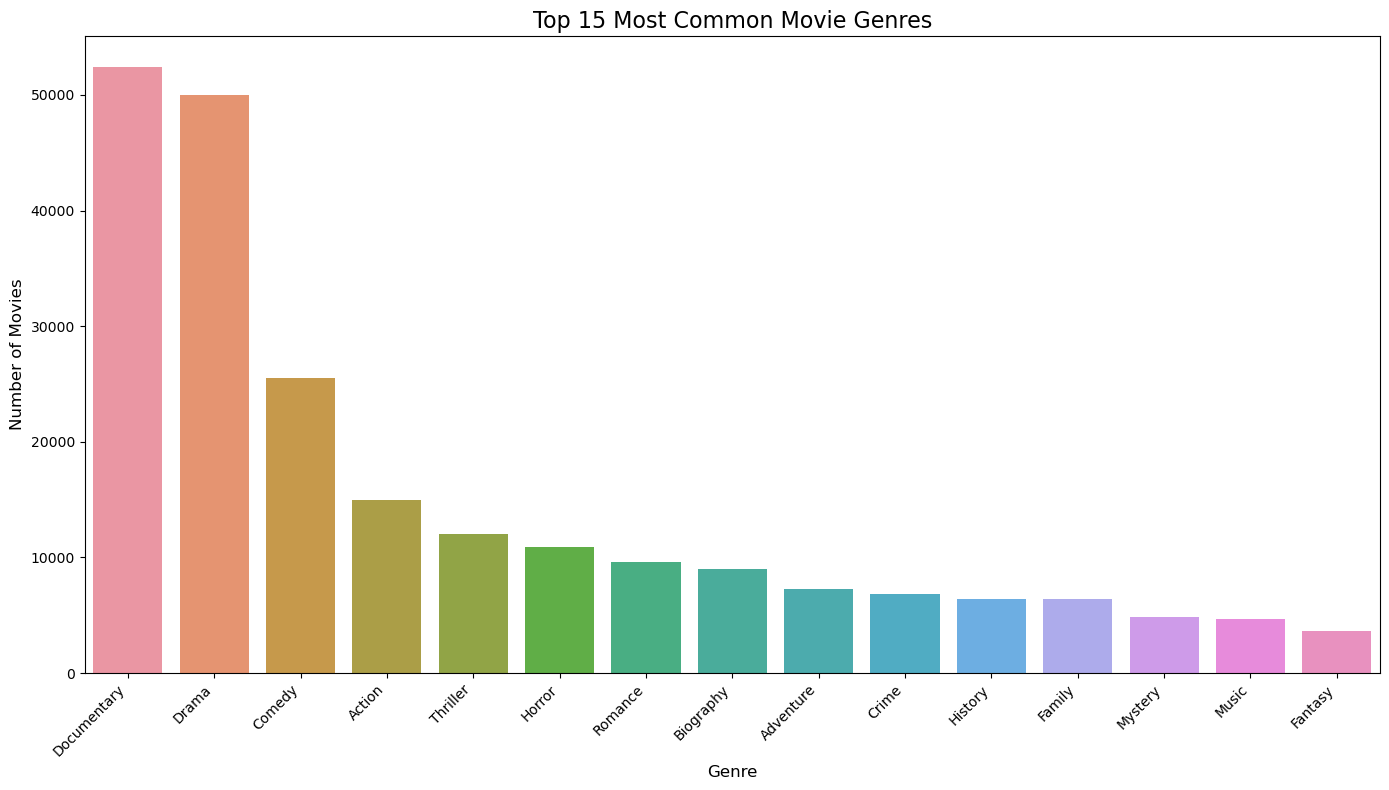

In [117]:
# The 'genres' column contains multiple genres separated by commas, so we need to split them
genre_series = df['genres'].str.split(',').explode()

# Count the occurrences of each genre
genre_counts = genre_series.value_counts()

# Get the top 15 genres
top_genres = genre_counts.head(15)

plt.figure(figsize=(14, 8))
sns.barplot(
    x=top_genres.index,
    y=top_genres.values
)
plt.title('Top 15 Most Common Movie Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observation**

The bar chart highlights the top 15 most frequently occurring movie genres. The most common genre is Documentary, followed by Drama, Comedy, and Action. This analysis shows that a significant portion of the movies in the dataset are serious or informative, which may reflect the types of films that are more likely to be independently produced or released. The prominence of genres like Thriller and Action also shows the popularity of these genres.

### 2.2.5 Distribution of Movie Runtimes for The Top Genres
We try to look at what is the median runtime that these specific genres of movies tend to take

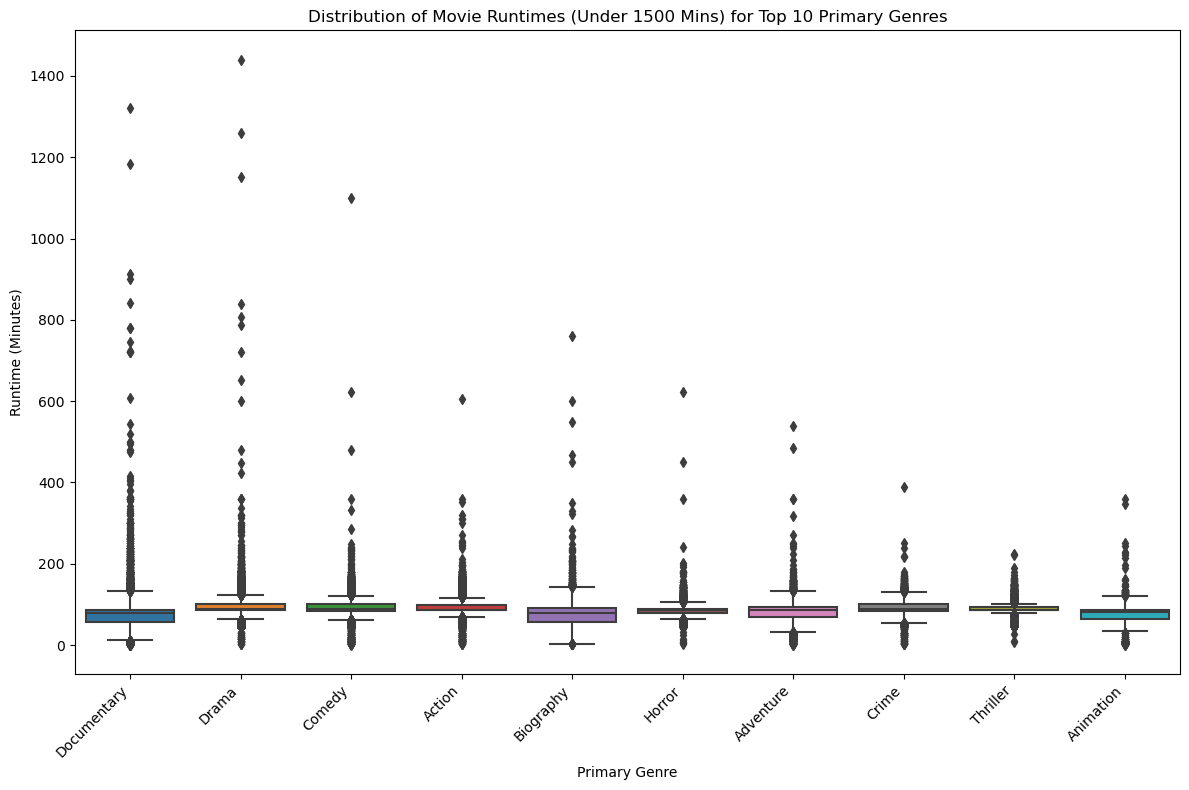

In [25]:
#Filter out runtimes >= 1500 minutes ---
df_filtered = df[df['runtime_minutes'] < 1500].copy()

# Extract the primary genre from the 'genres' column
df_filtered['primary_genre'] = df_filtered['genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown')


# Find the top 10 most frequent primary genres from the *filtered* data
top_genres = df_filtered['primary_genre'].value_counts().nlargest(10).index

# Filter the DataFrame to include only movies belonging to these top genres
df_top_genres = df_filtered[df_filtered['primary_genre'].isin(top_genres)]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_genres, x='primary_genre', y='runtime_minutes', order=top_genres)
plt.title('Distribution of Movie Runtimes (Under 1500 Mins) for Top 10 Primary Genres')
plt.xlabel('Primary Genre')
plt.ylabel('Runtime (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('runtime_by_genre_filtered_boxplot.png')

plt.show()

**Observation**

From this visualization, we can observe:

***Median Runtimes***: The horizontal line inside each box represents the median runtime. Genres like Drama, Action, and Comedy have similar median runtimes, generally between 80 and 100 minutes.

***Variability***: The length of the boxes (the interquartile range) shows the variability in runtimes. Documentary and Drama films exhibit a wider range of runtimes compared to genres like Horror or Thriller.

***Outliers***: The dots above the "whiskers" of the boxes represent outlier films with exceptionally long runtimes. Documentary and Drama have a significant number of these long-runtime outliers.

### 2.2.6 Trend of Movie Rating Over The Years

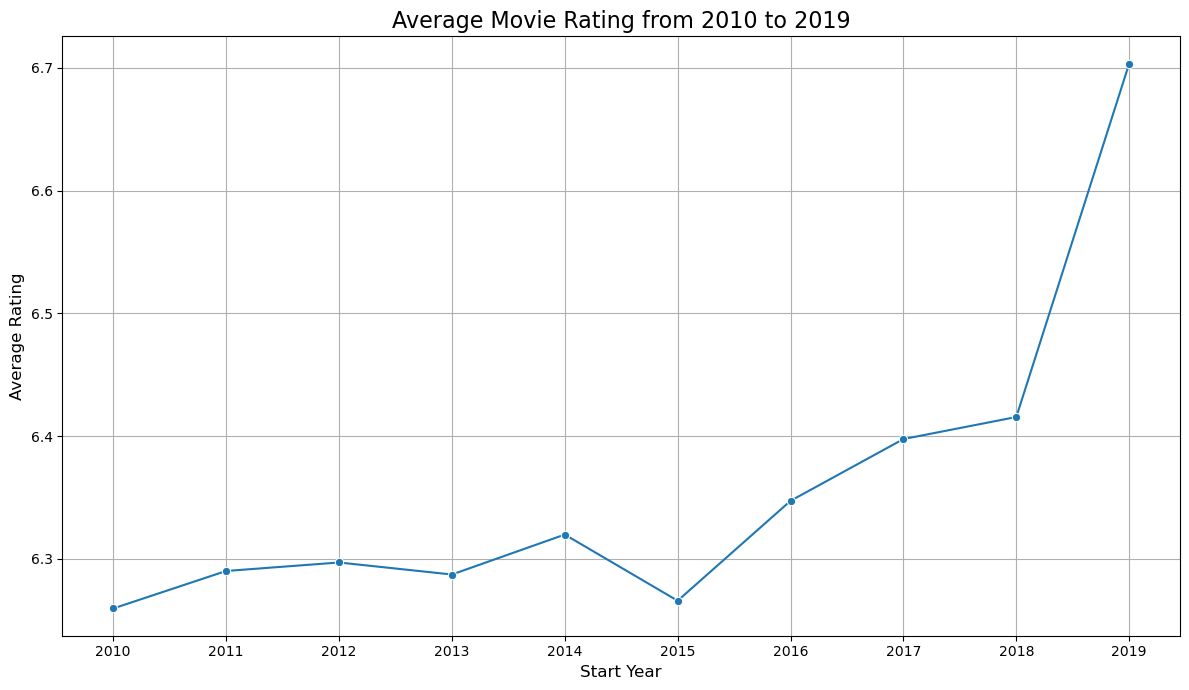

In [113]:
# Load the datasets
movie_basics = pd.read_csv('movie_basics.csv')
movie_ratings = pd.read_csv('cleaned_movie_ratings.csv')


# Merge the two dataframes on the common 'movie_id' column
merged_df = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Filter the data for the years 2010 to 2024
# The 'start_year' column is a float type so needs to be converted to int
merged_df['start_year'] = merged_df['start_year'].astype(int)
filtered_df = merged_df[(merged_df['start_year'] >= 2010) & (merged_df['start_year'] <= 2024)]

# Group by start year and calculate the mean average rating for each year
ratings_by_year = filtered_df.groupby('start_year')['averagerating'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=ratings_by_year,
    x='start_year',
    y='averagerating',
    marker='o'
)
plt.title('Average Movie Rating from 2010 to 2019', fontsize=16)
plt.xlabel('Start Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(ratings_by_year['start_year'].values)
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation**

The visualization shows that the average movie ratings have remained relatively stable during this period, fluctuating between approximately 6.3 and 6.7. There doesn't appear to be a significant upward or downward trend in the data. The sudden shift in 2019 could be due to a fewer count of movies compared to the other years

## 2.3 Visualisation of a previously explored and cleaned movie budget data file
In this section, we develop visualisations using python libraries to find technical insights on what information we wantt to conclude from the data we have. We can asses our problem statements and come up with business friendly recommendations based on our findings.

In [6]:
df2 = pd.read_csv("Cleaned_tn_movie_budget.csv")
df2.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,total_profit/loss,domestic_profit/loss,foreign_profit/loss,ROI,release_year,release_month,domestic_share%,foreign_share%,budget_category,is_profitable
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09,335507625.0,1.590838e+09,5.532577,2009,December,27.392401,72.607599,Blockbuster,1
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08,-169536125.0,3.940000e+08,1.546673,2011,May,23.053668,76.946332,Blockbuster,1
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08,-307237650.0,-2.430000e+08,-0.572108,2019,June,28.553472,71.446528,Blockbuster,0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09,128405868.0,6.134081e+08,3.243841,2015,May,32.715702,67.284298,Blockbuster,1
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08,303181382.0,3.795404e+08,3.153696,2017,December,47.100413,52.899587,Blockbuster,1


### 2.3.1 Perentage of Profitable Movies by Budget Category
We look at the budget category column which has four categories: Blockbuster, High budget, Mid budget and Low budget. And see what category makes the most profit margins

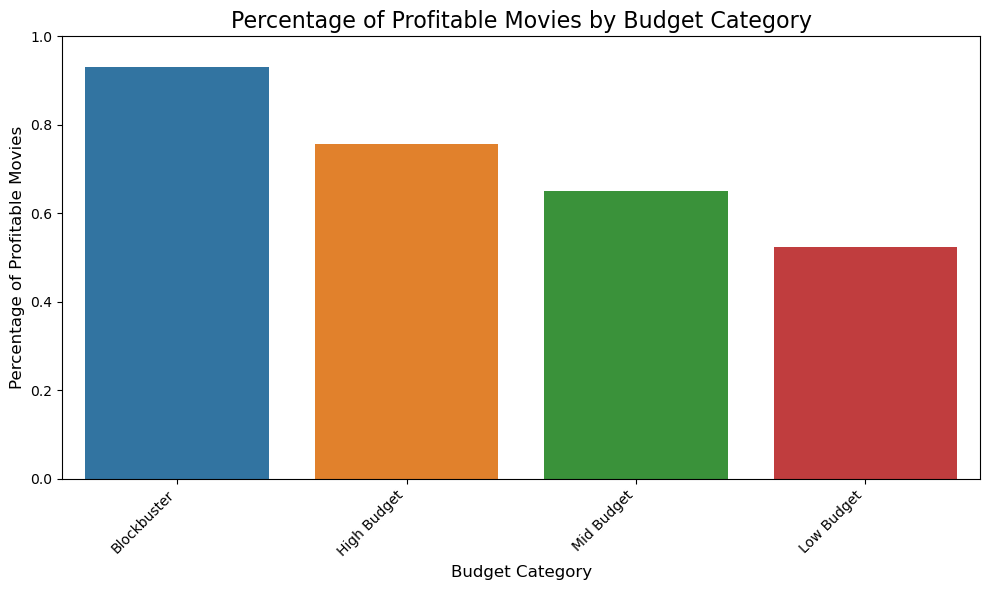

In [9]:


# Calculate the percentage of profitable movies for each budget category
profitability_by_budget = df2.groupby('budget_category')['is_profitable'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='budget_category',
    y='is_profitable',
    data=profitability_by_budget
)
plt.title('Percentage of Profitable Movies by Budget Category', fontsize=16)
plt.xlabel('Budget Category', fontsize=12)
plt.ylabel('Percentage of Profitable Movies', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('profitability_by_budget.png')
plt.show()

**Observation**

Here's a brief explanation of what the chart conveys:

***Blockbuster***: Movies with the highest budgets have the highest percentage of profitability, close to 90%.

***High Budget***: Movies with high budgets are also quite profitable, with a percentage slightly below the blockbuster category, around 75%.

***Mid Budget***: Movies with mid-range budgets have a moderate profitability rate, approximately 65%.

***Low Budget***: Movies with low budgets have the lowest profitability rate among the categories, around 50%.

The chart suggests that while blockbuster movies are the most profitable, high-budget movies also perform well. Mid and low-budget movies have lower profitability rates, indicating that budget size can influence a movie's success.

### 2.3.2 Relationship Between Return On Investment and Worldwide Gross

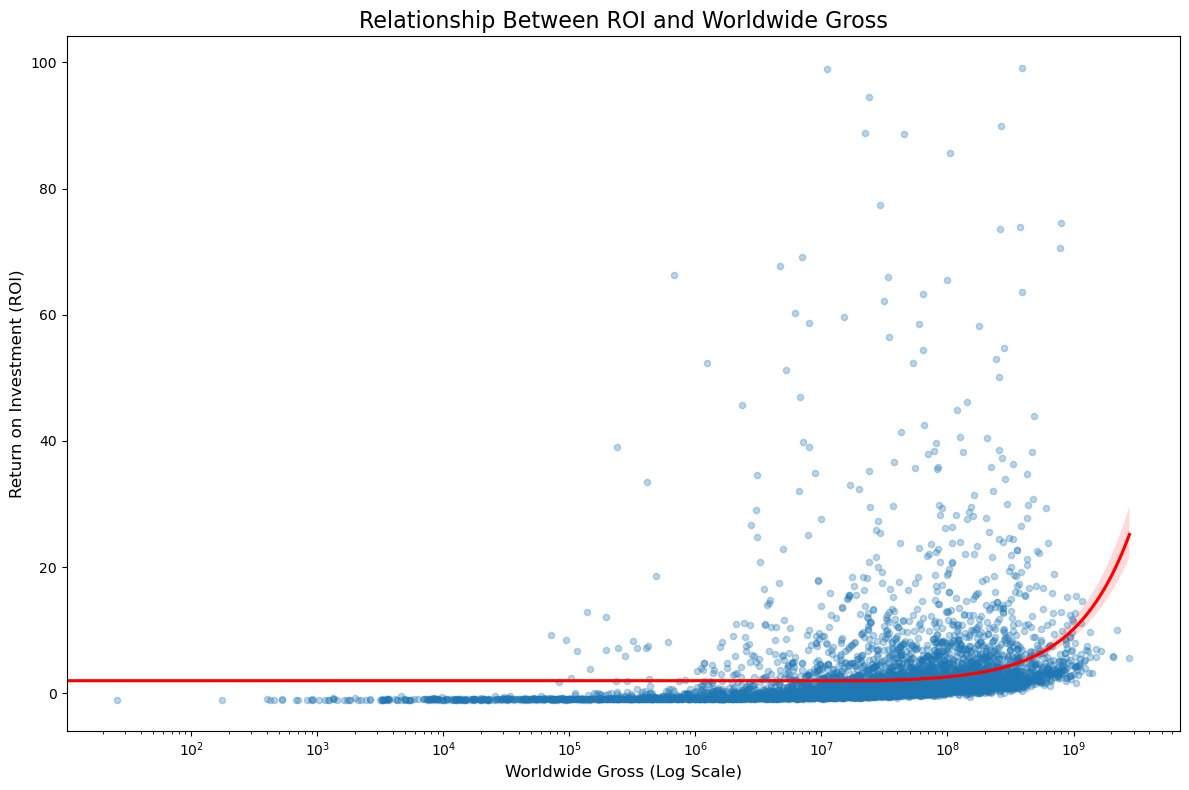

In [33]:
# Clean data for ROI outliers to make the plot more readable
df_clean_roi = df2[(df2['ROI'] > -100) & (df2['ROI'] < 100)]

plt.figure(figsize=(12, 8))
sns.regplot(
    x='worldwide_gross',
    y='ROI',
    data=df_clean_roi,
    scatter_kws={'alpha':0.3, 's':20},
    line_kws={'color':'red'}
)
plt.xscale('log')
plt.title('Relationship Between ROI and Worldwide Gross', fontsize=16)
plt.xlabel('Worldwide Gross (Log Scale)', fontsize=12)
plt.ylabel('Return on Investment (ROI)', fontsize=12)
plt.tight_layout()
plt.savefig('roi_vs_worldwide_gross.png')
plt.show()


**Observation**

The scatter plot visualizes the relationship between a movie's worldwide gross and its Return on Investment (ROI). The data is filtered to exclude extreme outliers to make the trend clearer. The plot shows that movies with a higher worldwide gross tend to have a higher ROI. This is intuitive, as more successful films generally yield a better return. However, the data also shows that a few movies with low worldwide gross still manage to achieve a high ROI, likely due to their extremely low production budgets.

### 2.3.3 Relationship Between Total Profit/Loss and Production Budget

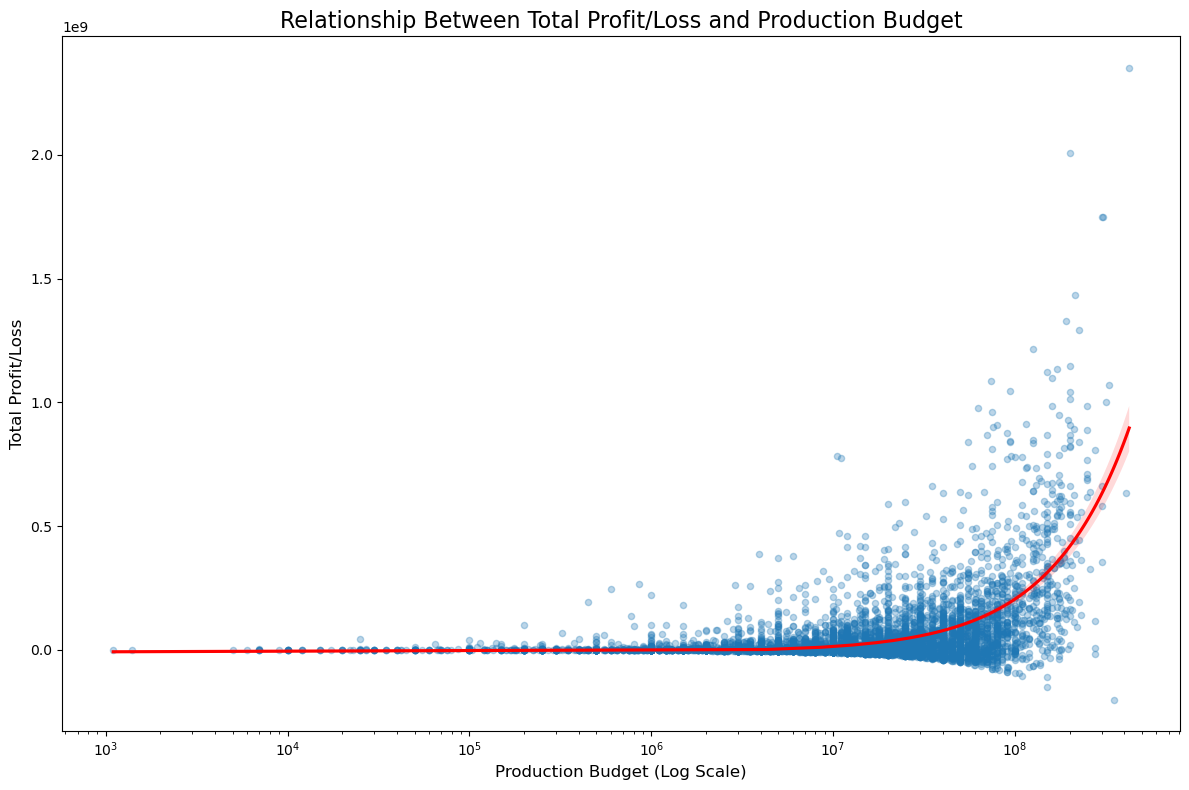

In [123]:
df_clean = df2.dropna(subset=['production_budget', 'total_profit/loss']).copy()

#new_df = df2(['production_budget', 'total_profit/loss']).copy()

plt.figure(figsize=(12, 8))
sns.regplot(
    x='production_budget',
    y='total_profit/loss',
    data=df_clean,
    scatter_kws={'alpha':0.3, 's':20},
    line_kws={'color':'red'}
)
plt.xscale('log')
plt.title('Relationship Between Total Profit/Loss and Production Budget', fontsize=16)
plt.xlabel('Production Budget (Log Scale)', fontsize=12)
plt.ylabel('Total Profit/Loss', fontsize=12)
plt.tight_layout()
plt.show()

**Observation**

This scatter plot visualizes the relationship between a movie's production budget and its total profit or loss. The plot shows a clear positive correlation: as the production budget increases, both the potential for profit and the risk of loss grow significantly. While high-budget movies can achieve astronomical profits, they also carry the greatest potential for massive financial losses. This highlights the high-stakes nature of the blockbuster film industry.

### 2.3.4 Profitability Rate for High vs. Low Box Office Returns

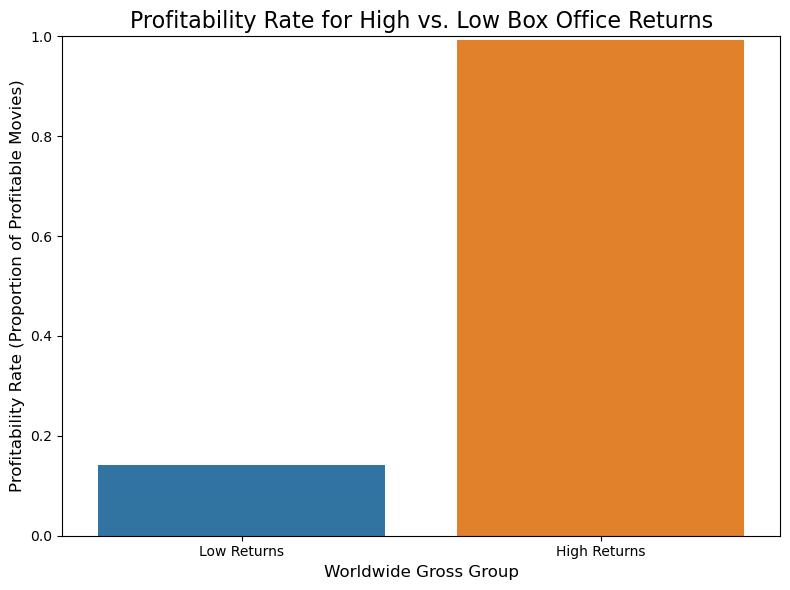

In [129]:
# Calculate profitability rate for each group
low_returns_profitability = df_low_returns['is_profitable'].mean()
high_returns_profitability = df_high_returns['is_profitable'].mean()

# Create a dataframe for plotting
profitability_data = pd.DataFrame({
    'group': ['Low Returns', 'High Returns'],
    'profitability_rate': [low_returns_profitability, high_returns_profitability]
})

plt.figure(figsize=(8, 6))
sns.barplot(
    x='group',
    y='profitability_rate',
    data=profitability_data
)
plt.title('Profitability Rate for High vs. Low Box Office Returns', fontsize=16)
plt.xlabel('Worldwide Gross Group', fontsize=12)
plt.ylabel('Profitability Rate (Proportion of Profitable Movies)', fontsize=12)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('profitability_by_returns.png')
plt.show()

**Observation**

This visualization compares the profitability rate (the percentage of movies that made a profit) between the two groups.

***High-Return Movies***: The profitability rate for this group is nearly 95%. This is expected, as a movie in the top 25% of worldwide gross is almost guaranteed to have earned back its production costs and more.

***Low-Return Movies***: The profitability rate for this group is dramatically lower, at around 45%. This shows that many movies with low box office returns end up being financial losses

### 2.3.5 Distribution of Budget Categories for High vs. Low Box Office Returns

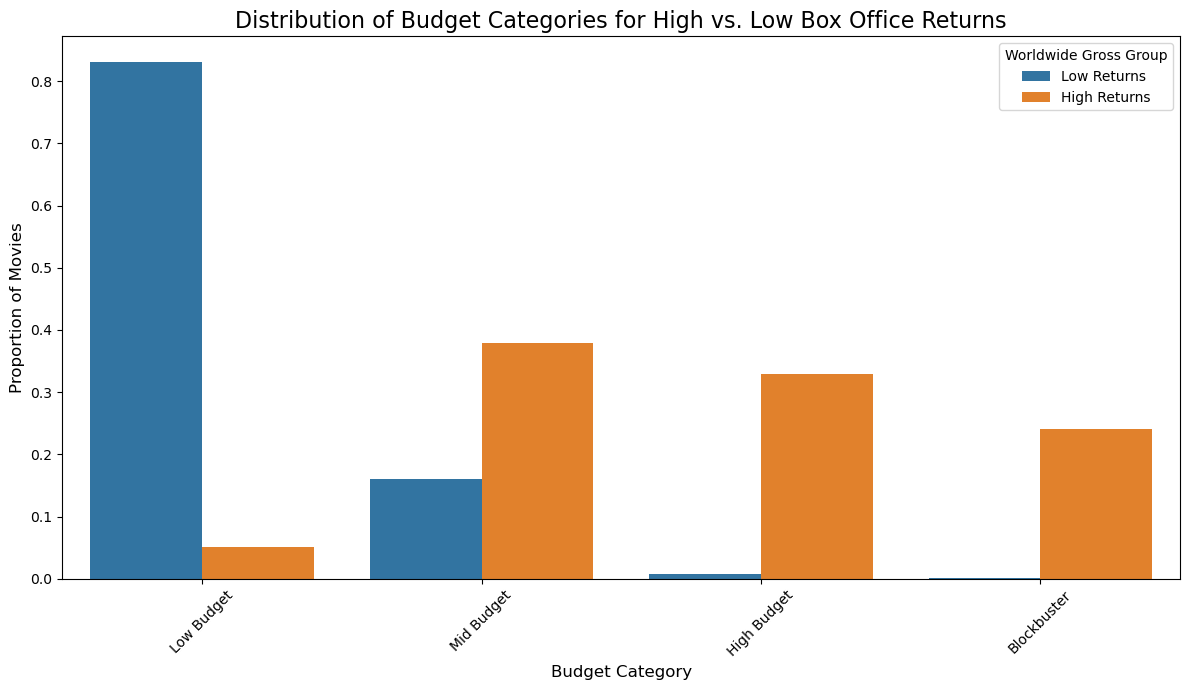

In [126]:
# Define "high" and "low" returns based on worldwide gross quartiles
low_gross_threshold = df2['worldwide_gross'].quantile(0.25)
high_gross_threshold = df2['worldwide_gross'].quantile(0.75)

# Create two dataframes for the high and low return groups
df_low_returns = df2[df2['worldwide_gross'] <= low_gross_threshold]
df_high_returns = df2[df2['worldwide_gross'] >= high_gross_threshold]

# Calculate the distribution of budget categories for each group
low_returns_budget_dist = df_low_returns['budget_category'].value_counts(normalize=True).reset_index()
low_returns_budget_dist.columns = ['budget_category', 'proportion']
low_returns_budget_dist['group'] = 'Low Returns'

high_returns_budget_dist = df_high_returns['budget_category'].value_counts(normalize=True).reset_index()
high_returns_budget_dist.columns = ['budget_category', 'proportion']
high_returns_budget_dist['group'] = 'High Returns'

# Combine the two dataframes for plotting
budget_dist_combined = pd.concat([low_returns_budget_dist, high_returns_budget_dist])

# Create a grouped bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    x='budget_category',
    y='proportion',
    hue='group',
    data=budget_dist_combined
)
plt.title('Distribution of Budget Categories for High vs. Low Box Office Returns', fontsize=16)
plt.xlabel('Budget Category', fontsize=12)
plt.ylabel('Proportion of Movies', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Worldwide Gross Group')
plt.tight_layout()
plt.savefig('budget_distribution_by_returns.png')
plt.show()

**Observation**

The visualization shows a clear difference in the distribution of budget categories between high- and low-return movies.

***High-Return Movies***: A significant majority of movies with high returns are categorized as Blockbusters, followed by High Budget and Medium Budget. This confirms that a larger production budget is a key characteristic of movies that achieve massive box office success.

***Low-Return Movies***: In stark contrast, movies with low returns are predominantly Low Budget and Micro Budget films. This indicates that movies with smaller budgets are far less likely to be box office hits, but as seen in previous analyses, they are not necessarily less profitable overall.

### 2.3.6 Trend in Average Movie Budgets (2010-2024)

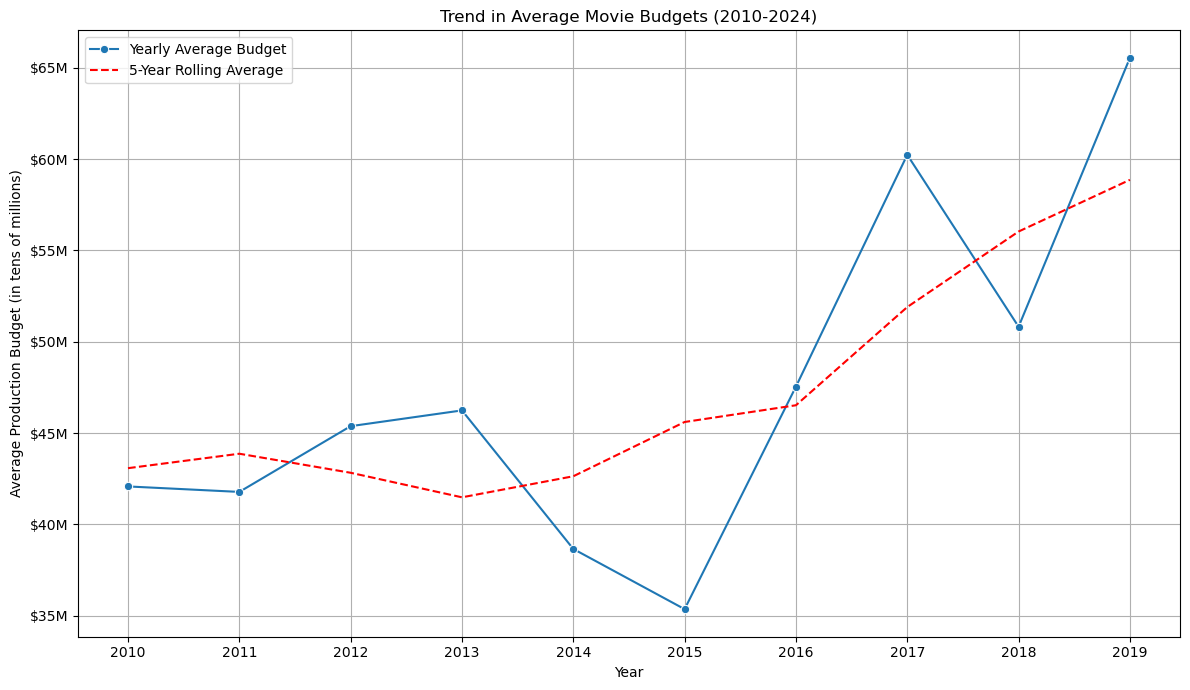

In [148]:
# Load the datasets
basics = pd.read_csv('movie_basics.csv')
ratings = pd.read_csv('cleaned_movie_ratings.csv')
budgets = pd.read_csv('Cleaned_tn_movie_budget.csv')

# Merge basics with ratings on their shared movie_id
df_merged = pd.merge(basics, ratings, on='movie_id', how='inner')

df_merged = pd.merge(df_merged, budgets, left_on=['primary_title', 'start_year'], right_on=['primary_title', 'release_year'], how='inner')

# Filter for the user-specified date range
df_filtered = df_merged[(df_merged['start_year'] >= 2010) & (df_merged['start_year'] <= 2024)]

# Group by year and calculate the average production budget
budget_trend = df_filtered.groupby('start_year')['production_budget'].mean().reset_index()

# Calculate a 5-year rolling average to smooth out the trend line
budget_trend['rolling_avg'] = budget_trend['production_budget'].rolling(window=5, min_periods=1, center=True).mean()


plt.figure(figsize=(12, 7))

# Plot the actual yearly average budget
sns.lineplot(data=budget_trend, x='start_year', y='production_budget', marker='o', label='Yearly Average Budget')

# Plot the 5-year rolling average
sns.lineplot(data=budget_trend, x='start_year', y='rolling_avg', color='red', linestyle='--', label='5-Year Rolling Average')

# Formatting the plot for clarity
plt.title('Trend in Average Movie Budgets (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Average Production Budget (in tens of millions)')
plt.legend()
plt.grid(True)
# Ensure x-axis ticks are displayed as integers for years
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
# Format the y-axis to be more readable (e.g., in millions)
plt.ticklabel_format(style='plain', axis='y')
formatter = plt.FuncFormatter(lambda x, p: f'${x/1_000_000:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

**Observation**

This visualization shows a significant increase in the average movie budget over this period.

The blue line represents the actual average budget for each year, which shows some sharp fluctuations.

The red dashed line is the 5-year rolling average. It smooths out the yearly spikes and dips, revealing a more consistent and clear upward trajectory, especially from 2016 onwards.

This indicates that, on average, films have become progressively more expensive to produce in the last decade and a half.

### 2.3.7 Trends in Movie Production and Reception Over Time

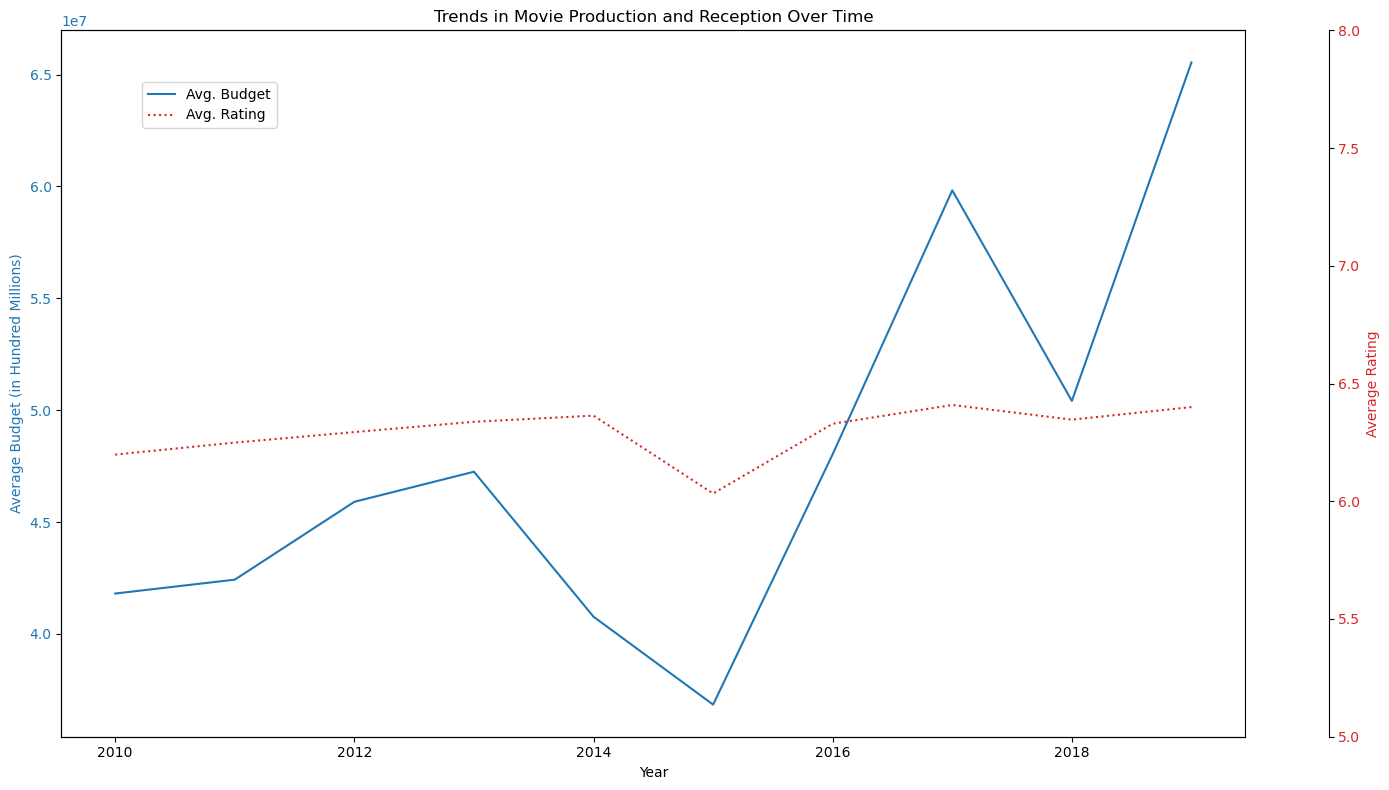

In [153]:
# Load the datasets
basics_df = pd.read_csv('movie_basics.csv')
ratings_df = pd.read_csv('cleaned_movie_ratings.csv')
budget_df = pd.read_csv('Cleaned_tn_movie_budget.csv')

# Standardize 'primary_title' column in both dataframes for a clean merge
#basics_df['primary_title_std'] = basics_df['primary_title'].str.lower().str.strip()
#budget_df['primary_title_std'] = budget_df['primary_title'].str.lower().str.strip()

# Merge basics and ratings on 'movie_id'
merged_df = pd.merge(basics_df, ratings_df, on='movie_id', how='inner')

# Merge the result with budget info on the standardized title and release year
# Including release_year helps disambiguate movies with the same title
merged_df = pd.merge(merged_df, budget_df, 
                     left_on=['primary_title', 'start_year'], 
                     right_on=['primary_title', 'release_year'], 
                     how='inner')
# Remove rows with infinite ROI or zero budget/votes for cleaner plots
final_df = merged_df[merged_df['production_budget'] > 1000] # Basic filter for realistic budgets
final_df = final_df[final_df['numvotes'] > 100] # Filter for movies with a minimum number of votes

# Filter for a more modern time range to see clearer trends
trends_df = final_df[final_df['start_year'] >= 1980]
trends_by_year = trends_df.groupby('start_year').agg(
    avg_budget=('production_budget', 'mean'),
    avg_rating=('averagerating', 'mean'),
    movie_count=('primary_title', 'count')
).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))
# Plot 1: Average Budget and Movie Count
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Budget (in Hundred Millions)', color='tab:blue')
ax1.plot(trends_by_year['start_year'], trends_by_year['avg_budget'], color='tab:blue', label='Avg. Budget')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Trends in Movie Production and Reception Over Time')

# Create a third y-axis for the average rating
ax3 = ax1.twinx()
# Offset the right spine of the third y-axis
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Average Rating', color='tab:red')
ax3.plot(trends_by_year['start_year'], trends_by_year['avg_rating'], color='tab:red', linestyle=':', label='Avg. Rating')
ax3.tick_params(axis='y', labelcolor='tab:red')
ax3.set_ylim(5, 8) # Set a fixed y-limit for rating to show nuanced changes

fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9));


**Observation**

***Ratings are Stagnant***: Conversely, the average movie rating (in orange) has remained remarkably flat, hovering around 6.0-6.5.

This tells us that despite a significant increase in investment in film production over the last two decades, the average audience reception has not changed.

### 2.3.8 Production Budget vs. Movie Rating

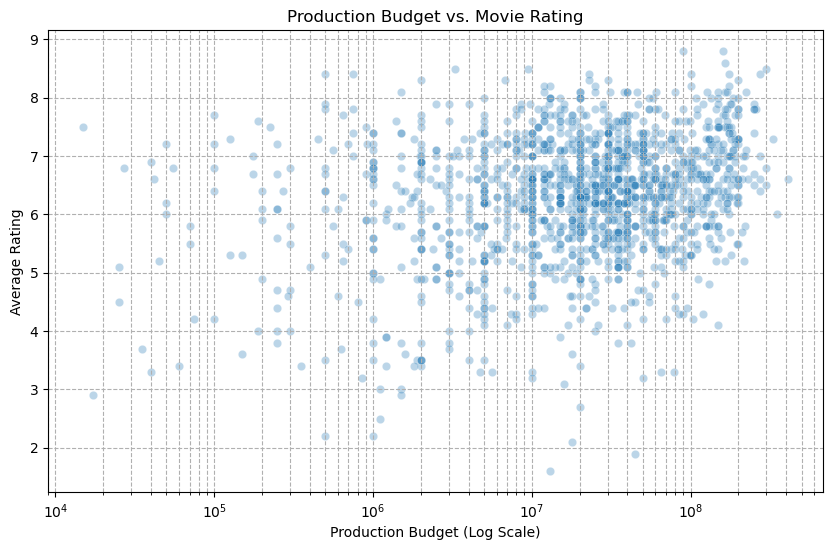

In [157]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='production_budget', y='averagerating', alpha=0.3)
plt.xscale('log') # Use log scale for budget
plt.title('Production Budget vs. Movie Rating')
plt.xlabel('Production Budget (Log Scale)')
plt.ylabel('Average Rating')
plt.grid(True, which="both", ls="--")



**Observation**

***Does a Bigger Budget Mean a Better Rated Movie?***
To see if shelling out more money results in a better-rated film, I've plotted the production budget against the average user rating.

From this visualization, we can see there is no clear correlation between a movie's budget and its rating. There is a massive cluster of movies across all budget levels—from low to blockbuster—that achieve ratings between 6 and 8. You can find poorly rated films at every budget level, just as you can find highly-rated ones. This suggests that while a budget can influence a film's scale, it's not the deciding factor for audience enjoyment.

### 2.3.9 Return on Investment (ROI) vs. Movie Rating

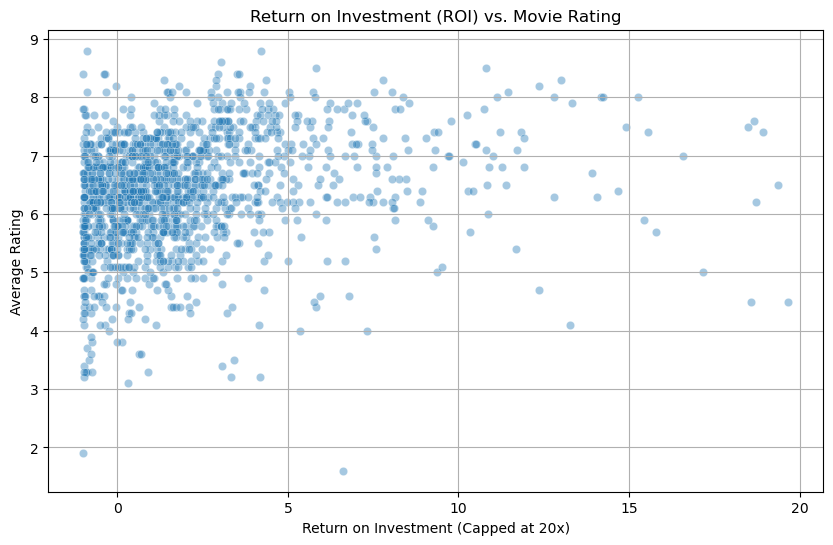

In [165]:
# For ROI vs Rating plot, filter out extreme ROI values for better visualization
# and remove movies with 0 budget to avoid division by zero errors
df_filtered_roi = df_merged[(df_merged['ROI'] < 20) & (df_merged['ROI'] > -1) & (df_merged['production_budget'] > 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_roi, x='ROI', y='averagerating', alpha=0.4)
plt.title('Return on Investment (ROI) vs. Movie Rating')
plt.xlabel('Return on Investment (Capped at 20x)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.savefig('roi_vs_rating.png')

**Observation**

***Are Highly-Rated Movies More Profitable?***
Here, we explore the connection between a movie's critical acclaim (average rating) and its financial success (Return on Investment).

This chart shows a very weak positive relationship. While many movies with high ratings (7.5 and above) do have a positive ROI, a high rating is not a guarantee of high profitability. Likewise, some movies with mediocre ratings (between 5 and 7) can still be very profitable. Financial success is a complex equation where marketing and audience appeal can sometimes outweigh critical reception.

## 2.4 Performing A Chi-Squared Test: Analyzing Independence Between Categorical Variables
The Chi-squared test of independence is ideal for determining if there is a statistically significant association between two categorical variables.

***Hypothesis***: Is there a relationship between a movie's profitability (is_profitable) and the month it was released?

***Null Hypothesis***: A movie's profitability is independent of its release month.

***Alternative Hypothesis***: A movie's profitability is dependent on its release month.

In [36]:
# import necessary library
from scipy.stats import chi2_contingency

# Load the dataframe.
data = pd.read_csv('Cleaned_tn_movie_budget.csv')

# Create a contingency table (cross-tabulation) of the two categorical variables.
contingency_table = pd.crosstab(data['release_month'], data['is_profitable'])

# Print the contingency table to inspect the counts.
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-squared test of independence.
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results.
print("\n Chi-Squared Test Results:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")

# Interpret the results.
alpha = 0.05
print("\n Interpretation")
if p_value < alpha:
    print(f"Since the p-value ({p_value}) is less than {alpha}, we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant relationship between a movie's profitability and its release month.")
else:
    print(f"Since the p-value ({p_value}) is greater than {alpha}, we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant relationship between a movie's profitability and its release month.")

Contingency Table:
is_profitable    0    1
release_month          
April          176  278
August         179  317
December       308  437
February       148  244
January        135  212
July           124  316
June           145  334
March          180  290
May            139  268
November       144  342
October        232  341
September      215  278

 Chi-Squared Test Results:
Chi-squared statistic: 56.74972253928975
P-value: 3.6997308209245245e-08
Degrees of freedom: 11

 Interpretation
Since the p-value (3.6997308209245245e-08) is less than 0.05, we reject the null hypothesis.
Conclusion: There is a statistically significant relationship between a movie's profitability and its release month.


**Results and Interpretation**

The test results show a p-value of approximately 3.70 times(10 −8) since this value is much smaller than the standard significance level of alpha=0.05, we reject the null hypothesis.

This means there is strong statistical evidence to suggest that there is a significant relationship between a movie's profitability and its release month. The month in which a movie is released is not independent of whether or not it is profitable.

## 2.5 Pearson's Correlation Test: Checking for a Linear Relationship
Pearson's correlation coefficient measures the strength and direction of a linear relationship between two continuous variables. By performing this test, you can determine if a higher production budget is statistically associated with a higher worldwide gross. The test provides both a correlation coefficient (r-value) and a p-value to confirm if the observed relationship is statistically significant and not just due to random chance.

In [32]:
#import libraries
from scipy.stats import pearsonr

# Extract the two continuous variables.
production_budget = data['production_budget']
worldwide_gross = data['worldwide_gross']

# Perform Pearson's correlation test.
correlation_coefficient, p_value = pearsonr(production_budget, worldwide_gross)

# Print the results.
print(f"Pearson's correlation coefficient (r-value): {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpret the results.
alpha = 0.05
print("\n Interpretation")
if p_value < alpha:
    print(f"Since the p-value ({p_value}) is less than {alpha}, we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant linear relationship between production budget and worldwide gross.")
    if correlation_coefficient > 0:
        print(f"The positive r-value ({correlation_coefficient:.2f}) suggests a positive correlation: as the production budget increases, the worldwide gross tends to increase.")
    elif correlation_coefficient < 0:
        print(f"The negative r-value ({correlation_coefficient:.2f}) suggests a negative correlation: as the production budget increases, the worldwide gross tends to decrease.")
else:
    print(f"Since the p-value ({p_value}) is greater than {alpha}, we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant linear relationship between production budget and worldwide gross.")

Pearson's correlation coefficient (r-value): 0.7483059765694755
P-value: 0.0

 Interpretation
Since the p-value (0.0) is less than 0.05, we reject the null hypothesis.
Conclusion: There is a statistically significant linear relationship between production budget and worldwide gross.
The positive r-value (0.75) suggests a positive correlation: as the production budget increases, the worldwide gross tends to increase.


**Results and Interpretion**

The test produced a Pearson's correlation coefficient (r-value) of approximately 0.75 and a p-value of 0.0.

***P-value***: The p-value is effectively zero(doesn't mean that the probability is exactly zero. Instead, it indicates that the p-value is an extremely small number, so small that it has been rounded down to 0.0 by the Python environment's floating-point precision.), which is much smaller than the standard significance level of alpha=0.05. This means we reject the null hypothesis. We can conclude that the linear relationship between production budget and worldwide gross is statistically significant.

***Correlation Coefficient***: The positive r-value of 0.75 indicates a strong, positive linear relationship. This means that as the production budget increases, the worldwide gross tends to increase as well. This supports the common belief that movies with larger budgets often generate more revenue.

# Conclusions

Based on all the visualizations we've created and analyzed, here is a summary of the key conclusions and actionable business recommendations for a film studio.

**Key Conclusions**

***Financial Investment Does Not Guarantee Critical Success***: There is no significant correlation between a movie's production budget and its average rating. We've seen that budgets have consistently risen over the last two decades, while average audience ratings have remained flat. This indicates that spending more money does not ensure a better-received film.

***There is a "Sweet Spot" for Runtime***: The vast majority of highly-rated films (between 6.5 and 8.0) have a runtime between 90 and 120 minutes. Films that are significantly shorter or longer are less common and don't hit this sweet spot of audience reception as frequently.

***The Film Market is Crowded and Increasingly Expensive***: Movie production saw a major boom in the 2010s, and while it has dipped recently, the market remains saturated. Combined with the rising costs of production, this makes it harder and more expensive than ever for a film to stand out and capture an audience.


# Business Recommendations


Here are data-driven recommendations to guide strategic decisions in film production and investment:

***Prioritize Story over Spectacle*** 

Since a large budget doesn't guarantee a good rating, resources should be strategically allocated. Shift focus from inflating budgets with expensive CGI or A-list salaries toward investing in high-quality scriptwriting and unique storytelling. A compelling story is a more cost-effective way to achieve critical success.

***Target the 90-120 Minute Runtime***

For films aiming for broad commercial appeal, directors and producers should aim for a final cut between 90 and 120 minutes. Our data clearly shows this is the optimal length to achieve favorable audience ratings, making it a less risky and more commercially viable choice.

***Adopt a Niche Audience Strategy***

Given the crowded market, trying to create a film for everyone can result in a film for no one. Instead, focus on creating films for specific, underserved audiences. As seen with the success of genre films, cultivating a loyal niche fanbase can be more profitable and sustainable than competing in the blockbuster space.

***Optimize Your Budgeting Strategy***

Given the strong positive correlation between budget and gross revenue, a key recommendation is to be strategic with your investment. For films with high potential, consider a larger budget to increase the likelihood of a higher worldwide gross. However, this must be balanced against the risk of loss, so a thorough financial analysis is crucial.

***Develop a Data-Driven Release Schedule***

Since a movie's profitability is linked to its release month, a studio should analyze the historical data to identify the most successful release months for different types of films (e.g., genre, target audience, budget size). By aligning your release schedule with these findings, you can increase a film's chances of financial success. This may involve avoiding crowded release periods or targeting months with historically higher profitability.

***Tailor Your Strategy to Movie Category***

The difference in worldwide gross between blockbuster and non-blockbuster movies highlights the importance of having a clear strategy for each film. If the goal is maximum worldwide gross, a blockbuster strategy with a high budget is a valid path. However, for smaller-scale projects, the focus might shift from high gross revenue to achieving profitability on a more modest budget.